In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = []

with open('Data/Spinning_wheel/Part_0.txt', 'r') as file:
  for _ in range(5):
    next(file)
  
  for line in file:
    columns = line.split(";")
    data.append(int(columns[0]))

data = np.array(data)

In [34]:
norm_data = np.diff(data)

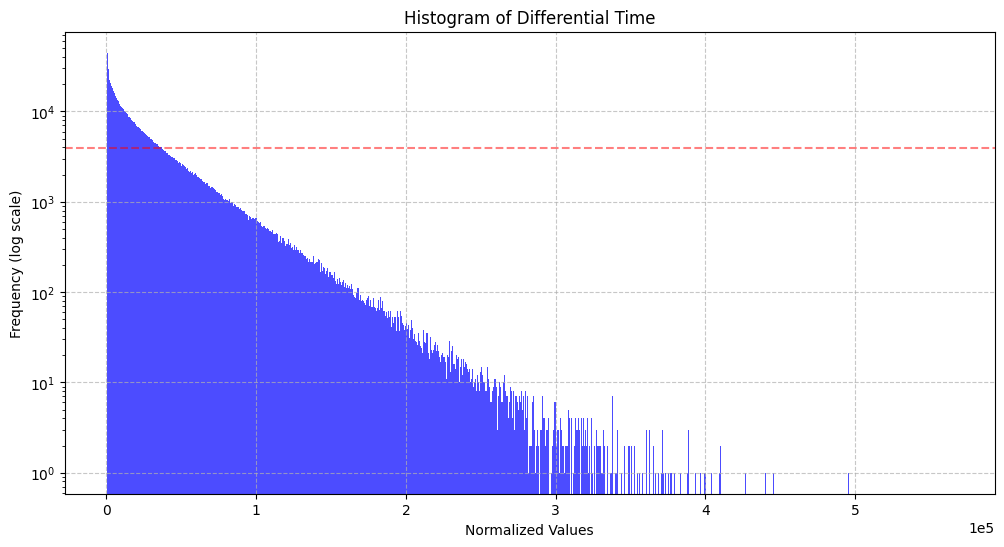

In [35]:
plt.figure(figsize=(12, 6))
plt.hist(norm_data, bins=1000, log=True, color='blue', alpha=0.7)

plt.xlabel('Normalized Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Differential Time')

plt.grid(linestyle='--', alpha=0.7)
plt.axhline(3900, color = "red", alpha = 0.5, linestyle="--")

plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

plt.show()

In [36]:
counts = []
deltaT = 5e6 / 81

for i in range(0, len(norm_data) - 1):
  count = 0
  time = norm_data[i]
  
  while (time <= deltaT):
    time += norm_data[i+1]
    count += 1
  
  counts.append(count)

counts = np.array(counts)
counts = counts[counts < 50]

probs = counts / sum(counts)

In [37]:
print(max(counts))

49


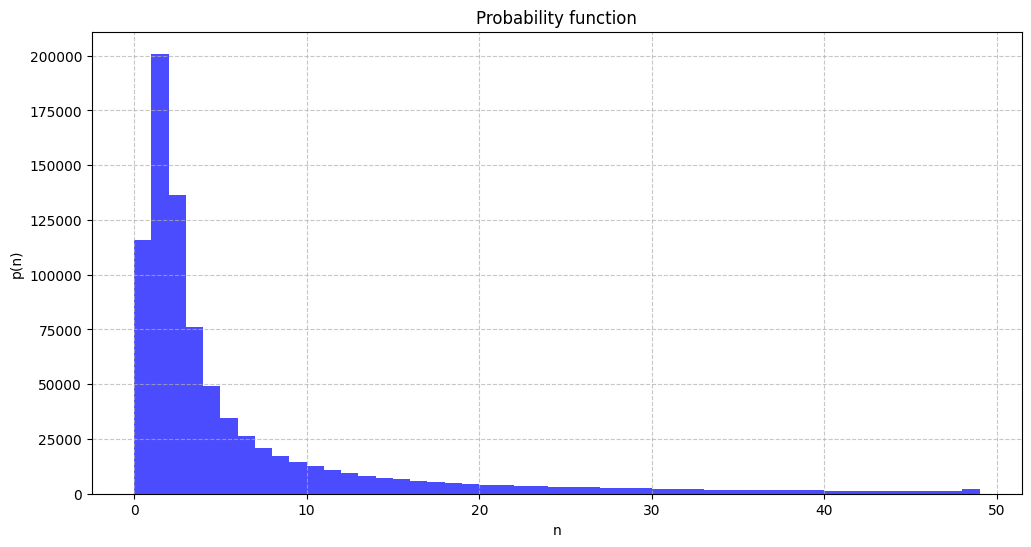

In [38]:
plt.figure(figsize=(12, 6))
plt.hist(counts, bins=max(counts), color='blue', alpha=0.7)

plt.xlabel('n')
plt.ylabel('p(n)')
plt.title('Probability function')

plt.grid(linestyle='--', alpha=0.7)

plt.show()

In [39]:
print(norm_data[0] * 81 * 10e-6)

5.184810000000001
